# Eurovision Song Contest

This notebook requires that the following files (from https://github.com/mantzaris/eurovision) are in the same directory:
- 1957.csv
- 1958.csv
- ...
- 2017.csv

## Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
import numpy as np
# matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm, to_hex
from matplotlib.ticker import MultipleLocator
%matplotlib inline
# pandas
import pandas as pd

## Read the data

In [3]:
df = pd.read_csv("1957.csv")
df.head()

,From country,Austria,Belgium,Denmark,France,Germany,Italy,Luxembourg,Switzerland,The Netherlands,United Kingdom
0,Austria,0,0,0,0,0,0,3,0,6,1
1,Belgium,0,0,0,2,1,1,0,0,5,1
2,Denmark,0,2,0,2,0,1,0,2,3,0
3,France,0,0,0,0,6,0,0,0,4,0
4,Germany,0,2,0,6,0,0,0,1,1,0


In [3]:
df = pd.read_csv("2017.csv")
df.head()

,From country,Albania,Armenia,Australia,Austria,Azerbaijan,Belarus,Belgium,Bulgaria,Croatia,...,Romainia,San Marino,Serbia,Slovenia,Spain,Sweden,Switzerland,The Netherlands,Ukraine,United Kingdom
0,Albania,0,7,4,0,2,0,0,10,0,...,3,0,0,0,0,0,0,0,0,8
1,Armenia,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,6,0,0,0,4
2,Australia,0,1,0,3,0,0,0,8,0,...,0,0,0,0,0,6,0,4,0,12
3,Austria,0,0,0,0,0,7,2,10,0,...,0,0,0,0,0,4,0,12,0,1
4,Azerbaijan,0,0,0,0,0,12,0,2,1,...,3,0,0,0,0,0,0,0,7,0


By chance we spot that Romania is misspelled, so we check for spelling errors

In [4]:
for year in range(1957, 2018):
    df = pd.read_csv("{}.csv".format(year))
    countries1 = df['From country'].tolist()
    countries2 = df.columns.tolist()
    countries2.remove('From country')
    for c2 in countries2:
        if c2 not in countries1:
            print(year, c2)

2017 Romainia


Store all the data into a single data frame (and take care of the 'Romainia' spelling error) 

In [5]:
esc_points = pd.DataFrame()
for year in range(1957, 2018):
    df = pd.read_csv("{}.csv".format(year))
    df['Year'] = year
    df.rename(index=str, columns={"Romainia": "Romania"})
    esc_points = esc_points.append(df, ignore_index=True, sort=True)
esc_points.head()

,Albania,Armenia,Australia,Austria,Azerbaijan,Belarus,Belgium,Bosnia & Herzegovina,Bulgaria,Croatia,...,Slovenia,Spain,Sweden,Switzerland,The Netherlands,Turkey,Ukraine,United Kingdom,Year,Yugoslavia
0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,6.0,NaN,NaN,1.0,1957,NaN
1,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,5.0,NaN,NaN,1.0,1957,NaN
2,NaN,NaN,NaN,0.0,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,3.0,NaN,NaN,0.0,1957,NaN
3,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,4.0,NaN,NaN,0.0,1957,NaN
4,NaN,NaN,NaN,0.0,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,0.0,1957,NaN


Move the columns 'Year' and 'From country' to the beginning

In [6]:
cols = esc_points.columns.tolist()
cols.insert(0, cols.pop(cols.index('Year')))
cols.insert(1, cols.pop(cols.index('From country')))
esc_points = esc_points.reindex(columns=cols)
esc_points.head()

,Year,From country,Albania,Armenia,Australia,Austria,Azerbaijan,Belarus,Belgium,Bosnia & Herzegovina,...,Slovakia,Slovenia,Spain,Sweden,Switzerland,The Netherlands,Turkey,Ukraine,United Kingdom,Yugoslavia
0,1957,Austria,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,0.0,6.0,NaN,NaN,1.0,NaN
1,1957,Belgium,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,0.0,5.0,NaN,NaN,1.0,NaN
2,1957,Denmark,NaN,NaN,NaN,0.0,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,0.0,NaN
3,1957,France,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,0.0,4.0,NaN,NaN,0.0,NaN
4,1957,Germany,NaN,NaN,NaN,0.0,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,0.0,NaN


Save the table to a file

In [7]:
esc_points.to_csv("ESC_points_1957-2017.csv", sep=';', na_rep='NaN')

## Competing countries through the years

Visualize how the number of competing countries changed through the years

In [8]:
countries = esc_points[['From country', 'Year']].groupby('Year').count()
countries.head()

,From country
Year,
1957,10
1958,10
1959,11
1960,13
1961,16


In [9]:
countries.reset_index(inplace=True)
countries.columns = ['Year', 'Countries']
countries.head()

,Year,Countries
0,1957,10
1,1958,10
2,1959,11
3,1960,13
4,1961,16


The first year (1956) of ESC is missing, add it manually

In [10]:
countries.loc[-1] = [1956, 7]          # add a row
countries.index = countries.index + 1  # shift the index
countries = countries.sort_index()     # sort by index
countries.head()
# Note that if you run this cell more than once, you will get multiple rows with year 1956!

,Year,Countries
0,1956,7
1,1957,10
2,1958,10
3,1959,11
4,1960,13


Save the table to a file

In [11]:
esc_points.to_csv("ESC_countries_1956-2017.csv", sep=';')

### Visualize the number of countries

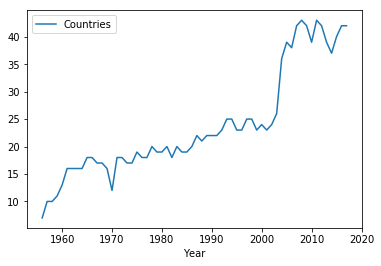

In [12]:
ax = countries.plot.line(x='Year', y='Countries')
plt.show()

Refine the visualization:
- Create a bigger plot (with larger fonts)
- Choose a brighter color
- Remove the legend
- Adjust the y axis (to start at 0)
- Add a title

In [15]:
categorical_map = plt.get_cmap('Set1') # Choose the red color from the 'Set1' categorical map
color = to_hex(categorical_map.colors[0])

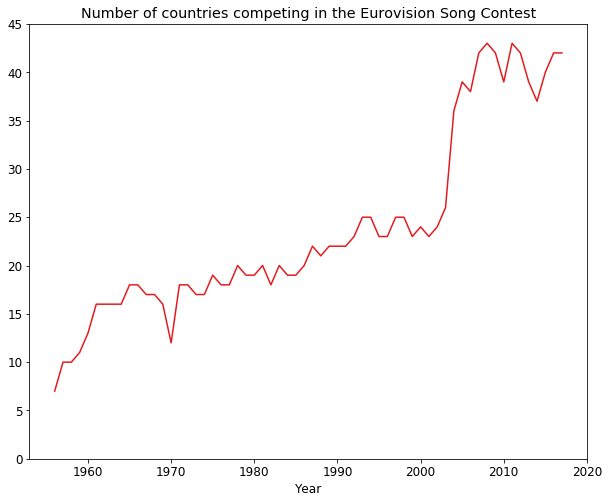

In [16]:
plt.rcParams.update({'font.size': 12})
ax = countries.plot.line(x='Year', y='Countries', figsize=(10,8), legend=None, c=color)
ax.set_ylim([0, 45])
ax.set_title('Number of countries competing in the Eurovision Song Contest')
plt.show()

Choose interesting years to be highlighted

In [17]:
key_years = countries.loc[countries['Year'].isin([1956, 1970, 1993, 2004])]
key_years

,Year,Countries
0,1956,7
14,1970,12
37,1993,25
48,2004,36


In [18]:
text = ['Only seven countries participated in 1956 (each with two songs,which never happened again)', 
        'Four countries did not participate in 1970 as a protest against rules allowing multiple winners in 1969', 
        'Qualifications were introduced in 1993 to limit the number of competing countries to 25', 
        'The introduction of a semi-final in 2004 enabled more countries to take part in the contest'
       ]
paragraph = ['Only seven countries participated\nin 1956 (each with two songs,\nwhich never happened again)',
             'Four countries did not participate\nin 1970 as a protest against rules\nallowing multiple winners in 1969',
             'Qualifications were introduced\nin 1993 to limit the number of\ncompeting countries to 25',
             'The introduction of a semi-final\nin 2004 enabled more countries\nto take part in the contest'
            ]
key_years = key_years.assign(Text=text, Paragraph=paragraph)
key_years

,Year,Countries,Paragraph,Text
0,1956,7,Only seven countries participated\nin 1956 (ea...,Only seven countries participated in 1956 (eac...
14,1970,12,Four countries did not participate\nin 1970 as...,Four countries did not participate in 1970 as ...
37,1993,25,Qualifications were introduced\nin 1993 to lim...,Qualifications were introduced in 1993 to limi...
48,2004,36,The introduction of a semi-final\nin 2004 enab...,The introduction of a semi-final in 2004 enabl...


Add annotations and data source (and create a function so that is easy to invoke)

In [19]:
title = 'Number of countries competing in the Eurovision Song Contest'
data_source = 'Data source: https://github.com/mantzaris/eurovision'

In [20]:
def plot_countries():
    ax = countries.plot.line(x='Year', y='Countries', figsize=(10,8), legend=None, c=color)
    key_years.plot.scatter(ax=ax, x='Year', y='Countries', s=50, legend=None, c=color)
    ax.set_ylim([0, 45])
    ax.set_title(title)
    ann_x = key_years['Year'].tolist()
    ann_y = key_years['Countries'].tolist()
    ann_t = key_years['Paragraph'].tolist()
    ax.annotate(ann_t[0], 
                xy=(ann_x[0] + 0.5, ann_y[0]), 
                xytext=(30, 7), textcoords='offset points', 
                ha='left', va='top', 
                arrowprops=dict(color='k', arrowstyle='-|>', connectionstyle='arc,angleA=90,angleB=0,armB=40'))
    ax.annotate(ann_t[1], 
                xy=(ann_x[1] + 0.5, ann_y[1]), 
                xytext=(30, 22), textcoords='offset points', 
                ha='left', va='top', 
                arrowprops=dict(color='k', arrowstyle='-|>', connectionstyle='arc,angleA=90,angleB=0,armB=40'))
    ax.annotate(ann_t[2], 
                xy=(ann_x[2] - 0.5, ann_y[2]), 
                xytext=(-30, 22), textcoords='offset points', 
                ha='right', va='top', 
                arrowprops=dict(color='k', arrowstyle='-|>', connectionstyle='arc,angleA=0,angleB=180,armB=50'))
    ax.annotate(ann_t[3], 
                xy=(ann_x[3] - 0.5, ann_y[3]), 
                xytext=(-30, 22), textcoords='offset points', 
                ha='right', va='top', 
                arrowprops=dict(color='k', arrowstyle='-|>', connectionstyle='arc,angleA=0,angleB=180,armB=50'))
    ax.annotate(data_source,
                color='dimgray',
                xy=(0, 0), 
                xycoords='figure fraction',
                xytext=(30, 0),  
                textcoords='offset points',
                ha='left', va='bottom')
    plt.show()

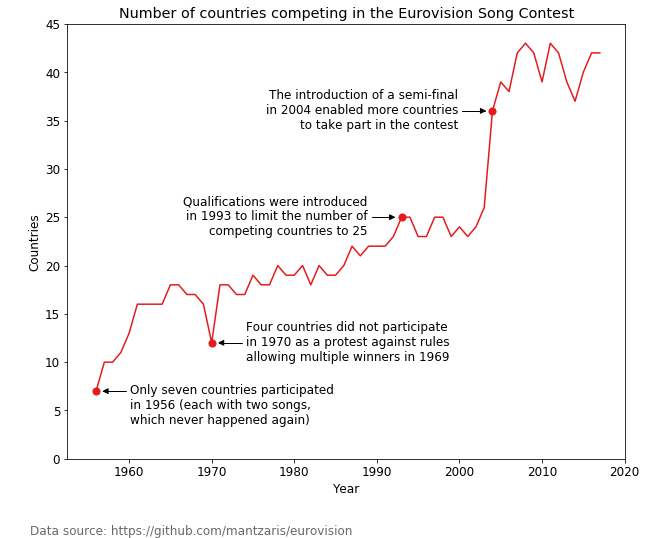

In [21]:
plot_countries()

Change style and try again

In [22]:
import warnings
import matplotlib.cbook

def change_style(style_name='default'):
    warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation) # To suppres deprecation warnings
    plt.rcParams.update(plt.rcParamsDefault) # To reset the style
    # To restart the inline backend 
    %matplotlib inline                       
    plt.style.use(style_name)

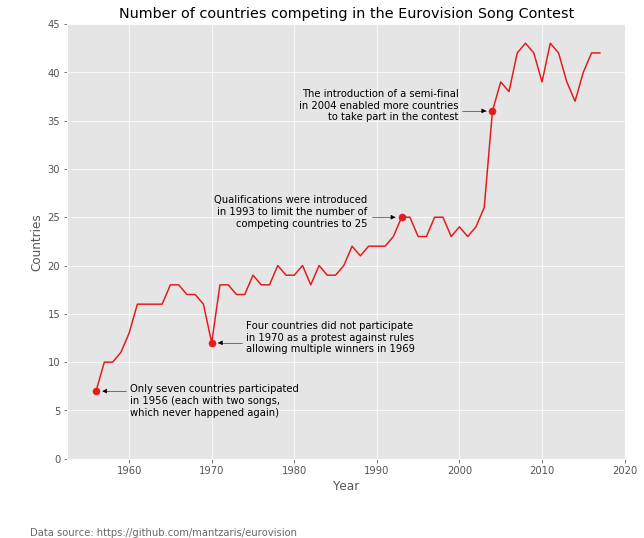

In [23]:
change_style('ggplot')
plot_countries()

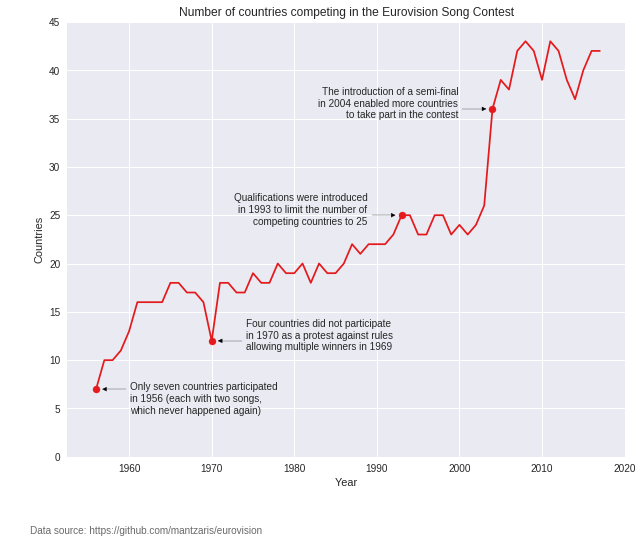

In [24]:
change_style('seaborn')
plot_countries()

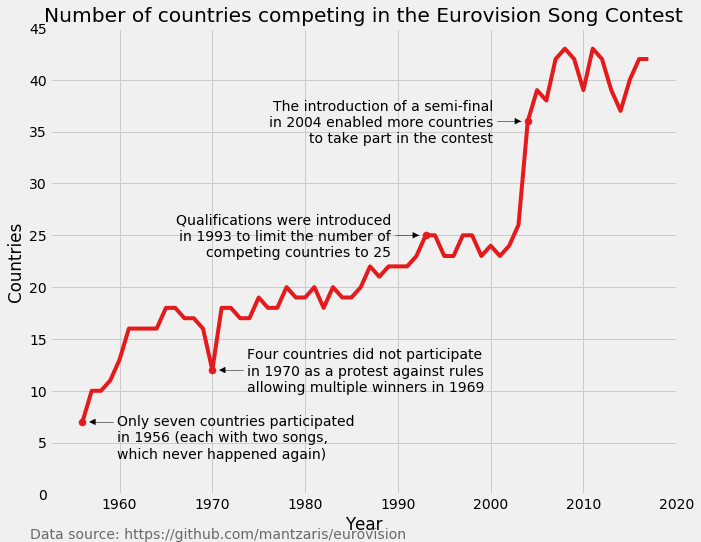

In [25]:
change_style('fivethirtyeight')
plot_countries()

### Add interactivity

#### Plotly

In [28]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

A useful Plotly cheatsheet: https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf

In [29]:
data = [
    go.Scatter(
        x=countries['Year'], 
        y=countries['Countries']
    )
]
iplot(data)

Refine the visualization:
- Choose a brighter color
- Label the axes and adjust their ranges
- Add a title

In [30]:
data = [
    go.Scatter(
        x=countries['Year'], 
        y=countries['Countries'], 
        line=dict(color=color)
    )
]
layout = dict(
    title=title,
    xaxis=dict(title='Year', range=[1955, 2020]),
    yaxis=dict(title='Countries', range=[0, 45])
)
iplot(dict(data=data, layout=layout))

Add annotations

In [31]:
data = [
    go.Scatter(
        x=countries['Year'], 
        y=countries['Countries'], 
        line=dict(color=color),
        hoverinfo='x+y'
    ),
    go.Scatter(
        x=key_years['Year'],
        y=key_years['Countries'],
        mode='markers',
        marker=dict(color=color, size=8),
        hoverinfo='text',
        hovertext=key_years['Text'].tolist())
]
layout = dict(
    title=title,
    xaxis=dict(title='Year', range=[1955, 2020]),
    yaxis=dict(title='Countries', range=[0, 45]),
    showlegend=False,
    annotations=[
        dict(xref='paper', x=-0.08,
             yref='paper', y=-0.22,
             text=data_source,
             showarrow=False)
    ]
)
iplot(dict(data=data, layout=layout))

#### Bokeh

In [34]:
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.models import HoverTool 

In [35]:
output_notebook()

Loading BokehJS ...

In [36]:
p = figure()
p.line(x='Year', y='Countries', source=countries)
show(p)

Refine the visualization:
- Choose a brighter color
- Label the axes and adjust their ranges
- Add a title

In [37]:
p = figure(title=title, 
           x_axis_label='Year', 
           y_axis_label='Countries',
           y_range=(0, 44))
p.line(x='Year', y='Countries', source=countries, color=color)
show(p)

Add annotations

In [38]:
p = figure(title=title, 
           x_axis_label='Year', 
           y_axis_label='Countries',
           y_range=(0, 44),
          )
tooltips_line = [
    ("Year", "$x{(0.)}"),
    ("Countries", "$y{(0.)}")
]
tooltips_circle = [
    ("Text", "$Text"),
]
bl = p.line(x='Year', y='Countries', source=countries, color=color)
bc = p.circle(x='Year', y='Countries', source=ColumnDataSource(key_years), size=6, color=color)
hover_line = HoverTool(renderers=[bl], tooltips=tooltips_line)
hover_circle = HoverTool(renderers=[bc], tooltips=tooltips_circle)
p.add_tools(hover_line, hover_circle)
show(p)